<a href="https://colab.research.google.com/github/EnochYounceSAIC/FiberOptics/blob/main/weektwo/channels_and_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
length = 3000
span = 100
sps = 50
symbol_rate = 10e9 #10 gigabauds
EDFA_total_power = 15 #dbm
lambda_light = 1543e-9
f_light = 3e8/lambda_light
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
dispersion = 18 #ps/nm/km
distance = np.arange(0,length,1)
EDFA_noise = 4.7
discrete_losses = np.zeros(length)
measured_nm =[1517, 1517.1683, 1517.5523, 1517.9365, 1518.3209, 1518.7055, 1519.0902, 1519.4752, 1519.8604, 1520.2547, 1520.6313, 1521.017, 1521.403, 1521.7891, 1522.1755, 1522.562, 1522.9487, 1523.3357, 1523.7228, 1524.1101, 1524.4976, 1524.8853, 1525.2733, 1525.6614, 1526.0497, 1526.4382, 1526.8269, 1527.2158, 1527.6049, 1527.9942, 1528.3837, 1528.7734, 1529.1633, 1529.5534, 1529.9436, 1530.3341, 1530.7248, 1531.1157, 1531.5068, 1531.8981, 1532.2896, 1532.6813, 1533.0732, 1533.4653, 1533.8575, 1534.25, 1534.6427, 1535.0356, 1535.4287, 1535.822, 1536.2155, 1536.6092, 1537.003, 1537.3972, 1537.7915, 1538.186, 1538.5807, 1538.9757, 1539.3708, 1539.7661, 1540.1616, 1540.5573, 1540.9533, 1541.3494, 1541.7457, 1542.1423, 1542.539, 1542.936, 1543.333, 1543.73, 1544.128, 1544.5258, 1544.9238, 1545.3219, 1545.72, 1546.1189, 1546.5177, 1546.9167, 1547.3159, 1547.7153, 1548.1149, 1548.5148, 1548.9148, 1549.315, 1549.7155, 1550.116, 1550.517, 1550.918, 1551.319, 1551.72, 1552.1225, 1552.52, 1552.926, 1553.328, 1553.73, 1554.134, 1554.537, 1554.94, 1555.34, 1555.747, 1556.15, 1556.55, 1556.96, 1557.36, 1557.768, 1557.768, 1558.17, 1558.5779, 1558.9831, 1559.388, 1559.794, 1560.2, 1560.6, 1561.012, 1561.42, 1561.826, 1562.232, 1562.6399, 1563.047, 1563.047, 1563.4548, 1563.8626, 1564.27, 1564.678, 1565.087, 1565.4959, 1565.9047, 1566.3138, 1566.72, 1567.13, 1567.54, 1567.95, 1568.36, 1568.36, 1568.77, 1569.18, 1569.594, 1570, 1570.416, 1570.83, 1571.239, 1571.65, 1572.06, 1572.475, 1572.888, 1573.3, 1573.71, 1574.127, 1574.54, 1574.95, 1575.367, 1575.78, 1576.196, 1576.61, 1577.03, 1577.44, 1577.85, 1578.27, 1578.686, 1579.102, 1579.52, 1579.94, 1580.35, 1581]
measured_db =[0, 8.43, 8.58, 8.76, 8.96, 9.19, 9.44, 9.71, 10, 10.31, 10.64, 10.98, 11.34, 11.71, 12.1, 12.5, 12.91, 13.33, 13.75, 14.19, 14.64, 15.09, 15.54, 16, 16.46, 16.92, 17.38, 17.85, 18.31, 18.76, 19.22, 19.67, 20.11, 20.54, 20.97, 21.41, 21.82, 22.17, 22.45, 22.65, 22.77, 22.8, 22.72, 22.55, 22.29, 21.96, 21.57, 21.13, 20.67, 20.21, 19.78, 19.39, 19.06, 18.8, 18.6, 18.46, 18.38, 18.36, 18.39, 18.46, 18.56, 18.7, 18.85, 19.03, 19.23, 19.43, 19.63, 19.8, 20, 20.2, 20.37, 20.53, 20.67, 20.8, 20.9, 21, 21.12, 21.21, 21.29, 21.36, 21.43, 21.48, 21.52, 21.55, 21.58, 21.59, 21.6, 21.6, 21.59, 21.58, 21.57, 21.55, 21.54, 21.52, 21.5, 21.5, 21.5, 21.4, 21.4, 21.4, 21.36, 21.3, 21.3, 21.25, 21.2, 21.2, 21.14, 21.07, 21, 20.89, 20.8, 20.68, 20.56, 20.44, 20.32, 20.2, 20.06, 19.93, 19.79, 19.79, 19.65, 19.5, 19.34, 19.18, 19, 18.84, 18.66, 18.47, 18.28, 18, 17.88, 17.67, 17.46, 17.46, 17.24, 17, 16.78, 16.55, 16.3, 16, 15.8, 15.54, 15.27, 15, 14.72, 14.4, 14.14, 13.85, 13.54, 13.24, 12.9, 12.6, 12.28, 11.94, 11.6, 11.26, 10.9, 10.56, 10.2, 9.83, 9.45, 9.07, 8.68, 0]


In [266]:
#This code is AI- assisted and is used for the generation of psuedorandom data to test the dispersion
def gen_random_data(type, amount):
  if type == '16qam':
    # 1. Generate random bits
    random_bits = np.random.randint(0, 2, 4*amount)

    # 2. Reshape into groups of 4 bits
    bit_groups = random_bits.reshape(-1, 4)

    # 3. Map 4-bit groups to 16-QAM constellation points
    # Define the 16-QAM constellation mapping
    qam16_mapping = {
        (0, 0, 0, 0): -3 - 3j, (0, 0, 0, 1): -3 - 1j, (0, 0, 1, 0): -3 + 3j, (0, 0, 1, 1): -3 + 1j,
        (0, 1, 0, 0): -1 - 3j, (0, 1, 0, 1): -1 - 1j, (0, 1, 1, 0): -1 + 3j, (0, 1, 1, 1): -1 + 1j,
        (1, 0, 0, 0):  3 - 3j, (1, 0, 0, 1):  3 - 1j, (1, 0, 1, 0):  3 + 3j, (1, 0, 1, 1):  3 + 1j,
        (1, 1, 0, 0):  1 - 3j, (1, 1, 0, 1):  1 - 1j, (1, 1, 1, 0):  1 + 3j, (1, 1, 1, 1): 1 + 1j
    }

    qam16_symbols = np.array([qam16_mapping[tuple(group)] for group in bit_groups])
    return qam16_symbols
  elif type == 'qpsk':
    # 1. Generate random bits
    random_bits_qpsk = np.random.randint(0, 2, 2*amount)

    # 2. Reshape into groups of 2 bits
    bit_groups_qpsk = random_bits_qpsk.reshape(-1, 2)

    # 3. Map 2-bit groups to QPSK constellation points
    # Define the QPSK constellation mapping
    qpsk_mapping = {
        (0, 0): -1 - 1j,
        (0, 1): -1 + 1j,
        (1, 0):  1 - 1j,
        (1, 1):  1 + 1j
    }

    qpsk_symbols = np.array([qpsk_mapping[tuple(group)] for group in bit_groups_qpsk])
    return qpsk_symbols
  elif type == 'bpsk':
    # 1. Generate random bits (0 or 1)
    random_bits_bpsk = np.random.randint(0, 2, amount)

    # 2. Map these bits to BPSK constellation points: 0 maps to -1, and 1 maps to 1.
    # This can be done by multiplying by 2 and subtracting 1: 0*2 - 1 = -1, 1*2 - 1 = 1
    bpsk_symbols = 2 * random_bits_bpsk - 1


def attenuate(signal,attenuation,location,length):
  #Takes the signal in mW, an attenuation in db/km, a location (index) for the signal, and a length in km
  #Works forward, such that it can be used on location 0 but not location 3000 (no more fiber to attenuate in)
  if location + 1 < length:
    signal[location+1] = signal[location]*10**(-attenuation / 10)


def const_power_EDFA(signal, noise, const_power,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_power is the power to return to (initial power generally), wavelength of the light, EDFA noise figure, and the location along the fiber
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  total_input_power = signal[location] + noise[location]
  power_ase_per_amp_mW = planks_const * f_light * EDFA_noise_linear * bandwidth_freq *1000# (mW)
  total_power_after_ase = total_input_power + power_ase_per_amp_mW
  scaling_factor = const_power / total_power_after_ase if total_power_after_ase > 1e-15 else 0
  signal[location] *= scaling_factor
  noise[location] *= scaling_factor

def const_power_EDFA_with_tilt_corrected(multi_channel_signal_power, multi_channel_noise, const_power_dBm, wavelength, EDFA_noise, location, gain_tilt_dB):
    #In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    #In mW:  both multi channel inputs
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    bandwidth_nm = 0.1e-9 #0.1nm
    f_light = 3e8/wavelength
    bandwidth_freq = bandwidth_nm * (f_light / wavelength)

    total_input_power_mW = np.sum(multi_channel_signal_power[:, location]) + np.sum(multi_channel_noise[:, location])
    target_total_power_mW = 10**(const_power_dBm/10)

    if total_input_power_mW < 1e-15:
        overall_linear_gain_needed = 0
    else:
        overall_linear_gain_needed = target_total_power_mW / total_input_power_mW

    avg_gain_dB = np.mean(gain_tilt_dB)
    linear_gain_tilt_scaling = 10**((gain_tilt_dB - avg_gain_dB) / 10)

    new_gains_linear = overall_linear_gain_needed * linear_gain_tilt_scaling

    linear_gains_applied = new_gains_linear
    power_ase_per_amp_mW_per_channel = planks_const * f_light * EDFA_noise_linear * bandwidth_freq * (linear_gains_applied - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0

    multi_channel_signal_power[:, location] *= new_gains_linear
    multi_channel_noise[:, location] *= new_gains_linear
    multi_channel_noise[:, location] += power_ase_per_amp_mW_per_channel


# The const_gain_EDFA function remains as is, as the focus was on const_power_EDFA
def const_gain_EDFA(signal, noise, const_gain,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_gain is the amplification gain(dB), wavelength of the light, EDFA noise figure, and the location along the fiber
  #Returns the signal and noise arrays to save the data
  #Adds ASE noise and amplifies by given gain
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  power_ase_per_amp = planks_const * f_light * EDFA_noise_linear * (10**(const_gain/10) - 1) * bandwidth_freq *1000# (mW)
  noise[location] += power_ase_per_amp
  signal[location] *= 10**(const_gain/10)
  noise[location] *= 10**(const_gain/10)
  # return signal, noise # Returning the arrays

def shape_signal(data,sps,num_weights,symbol_rate):
  #Takes the raw data in any format, the samples per signal, the number of weights for the filter, and the symbol rate
  #returns the signal where each pulse is replaced by a root raised cosine.
  sampling_rate = sps * symbol_rate
  time_step = 1 / sampling_rate # 1 / (500 * 10^9) seconds = 2 * 10^-12 seconds = 2 ps
  #RRC
  fs = sps
  alpha = 0.1
  x = 0.9999*np.arange(-int(num_weights/2),int(num_weights/2)+1,1)/fs
  raised_cos_weights = np.sinc(x)*(np.cos(alpha*np.pi*x)/(1-((2*alpha*x)**2)))

  #pulse shaping
  # 1. Upsample the symbols by inserting zeros
  upsampled_symbols = np.zeros(len(data) * sps, dtype=complex)
  upsampled_symbols[::sps] = data

  # 2. Convolve the upsampled signal with the raised_cos_weights filter.
  shaped_signal = np.convolve(upsampled_symbols, raised_cos_weights, mode='full')
  return shaped_signal

#chomatic disperson
def chrom_dispersion_total(positive_amount,negative_amount,lambda_signal, Is_Compensated, length,span):
  distance = np.arange(0,length,1)
  dispersion = np.zeros(len(distance))
  pos_dispersion = positive_amount*lambda_signal*1e9
  neg_dispersion = negative_amount*lambda_signal*1e9
  if(Is_Compensated):
    accumulated_dispersion = 0
    current_slope = pos_dispersion # Start with the positive slope
    for i in range(1, length):
        # Check if we are at a span boundary
        if i % span == 0:
            # Swap the slope between positive_amount and negative_amount
            if current_slope == pos_dispersion:
                current_slope = neg_dispersion
            else:
                current_slope = pos_dispersion
        accumulated_dispersion += current_slope # Add dispersion based on the current slope
        dispersion[i] = accumulated_dispersion

  else:
    dispersion = distance*positive_amount # Only positive dispersion if not compensated

  return dispersion

In [267]:
def const_power_EDFA_with_tilt(multi_channel_signal_power, multi_channel_noise, const_power_dBm, wavelength, EDFA_noise,location,gain_tilt_dB):
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    bandwidth_nm = 0.1e-9 #0.1nm
    f_light = 3e8/wavelength
    bandwidth_freq = bandwidth_nm * (f_light / wavelength)

    # Get input power for current location
    current_signal_input_mW = multi_channel_signal_power[:, location]
    current_noise_input_mW = multi_channel_noise[:, location]
    total_input_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW
    total_input_power_mW_sum = np.sum(total_input_power_mW_per_channel)


    target_total_power_mW = 10**(const_power_dBm/10)
    # Calculate the target total power per channel (for a perfectly flat distribution)
    target_total_power_per_channel_mW_flat = target_total_power_mW / len(current_signal_input_mW) # Assuming channels = len(current_signal_input_mW)


    avg_gain_dB = np.mean(gain_tilt_dB)
    linear_gain_tilt_scaling = 10**((gain_tilt_dB - avg_gain_dB) / 10)

    # Normalize the tilt scaling to sum to 1 (for distributing the target power per channel)
    epsilon = 1e-20
    normalized_tilt_scaling = linear_gain_tilt_scaling / np.sum(linear_gain_tilt_scaling + epsilon)


    # --- Set Output Power Per Channel with Tilt and Target Total Power (Previous Best Approach) ---
    # Calculate the target output power per channel based on tilt (for a flat distribution)
    # This aims to set the total power per channel to target_total_power_per_channel_mW,
    # distributed according to the normalized_tilt_scaling.
    target_output_power_per_channel_with_tilt = target_total_power_per_channel_mW_flat * normalized_tilt_scaling

    # Calculate the overall signal to total power ratio at the input
    overall_signal_input_ratio = np.sum(current_signal_input_mW) / (total_input_power_mW_sum + epsilon)

    # Distribute the target output power per channel between signal and noise
    # based on the overall input signal/total power ratio.
    # This is a simplification that assumes the signal/noise ratio is roughly similar across channels.
    output_signal_pre_ase = target_output_power_per_channel_with_tilt * overall_signal_input_ratio
    output_noise_pre_ase = target_output_power_per_channel_with_tilt * (1 - overall_signal_input_ratio)


    # Add ASE noise. Calculate nominal gain based on span loss.
    span_loss_linear = 10**(-0.2 * 100 / 10) # Assuming 0.2 dB/km over 100 km span
    nominal_gain_linear = 1 / span_loss_linear if span_loss_linear > epsilon else 10**(30/10)
    # Cap nominal gain
    max_gain_limit_linear = 10**(30/10)
    nominal_gain_linear = np.minimum(nominal_gain_linear, max_gain_limit_linear)

    # Apply nominal gain scaling to the relative tilt for noise calculation
    nominal_channel_gains_linear = nominal_gain_linear * linear_gain_tilt_scaling
    nominal_channel_gains_linear[nominal_channel_gains_linear < 1] = 1 # Gain for noise calculation must be >= 1


    power_ase_per_amp_mW_per_channel = planks_const * f_light * EDFA_noise_linear * bandwidth_freq * (nominal_channel_gains_linear - 1) * 1000
    power_ase_per_amp_mW_per_channel[power_ase_per_amp_mW_per_channel < 0] = 0

    # Add the calculated ASE noise to the output noise
    output_noise_with_ase = output_noise_pre_ase + power_ase_per_amp_mW_per_channel

    # --- Final Scaling to Force Total Output Power to Target ---
    # Calculate the current total output power after distributing and adding noise
    current_total_output = np.sum(output_signal_pre_ase) + np.sum(output_noise_with_ase)

    # Calculate the scaling factor needed to bring the current total output to the target total power
    final_scaling_factor = target_total_power_mW / (current_total_output + epsilon) if (current_total_output + epsilon) > 0 else 0

    # Apply the final scaling factor to the signal and noise arrays
    multi_channel_signal_power[:, location] = output_signal_pre_ase * final_scaling_factor
    multi_channel_noise[:, location] = output_noise_with_ase * final_scaling_factor
    # --- End Final Scaling ---


    # --- Removed Debugging Prints ---

Text(0, 0.5, 'Amplification (dB)')

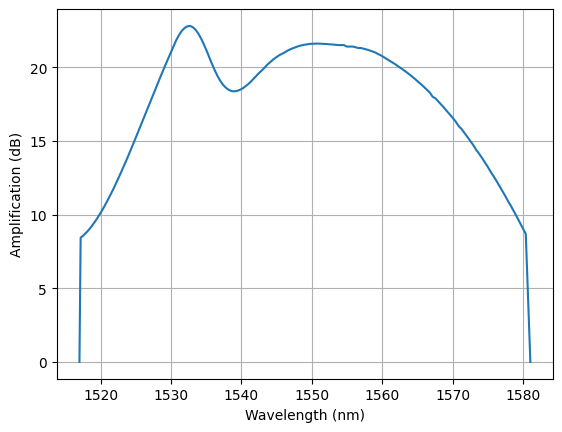

In [268]:
plt.plot(measured_nm,measured_db)
plt.xlabel('Wavelength (nm)')
plt.grid()
plt.ylabel('Amplification (dB)')

In [269]:
channels = 70
signal_length = 5000
channeled_lambdas = np.zeros(channels)
signals = np.zeros((channels, signal_length), dtype=complex)
gain_weights = np.zeros(channels)
channel_power = np.zeros(channels)
total_chrom_dispersion = np.zeros((channels,length))
def find_closest_numpy(data_array, target):
    idx = np.abs(data_array - target).argmin()
    return data_array[idx]

for i in range(channels):
  channel_power = EDFA_total_power-10*np.log10(channels)
  channeled_lambdas[i] = lambda_light + i*0.3e-9
  signals[i] = gen_random_data('16qam', signal_length)
  gain_weights[i] = measured_db[measured_nm.index(find_closest_numpy(measured_nm, channeled_lambdas[i]*1e9))]
print(gain_weights)

[19.8  20.   20.2  20.2  20.37 20.53 20.67 20.67 20.8  20.9  21.   21.
 21.12 21.21 21.29 21.29 21.36 21.43 21.48 21.48 21.52 21.55 21.58 21.58
 21.59 21.6  21.6  21.6  21.59 21.58 21.57 21.57 21.55 21.54 21.52 21.52
 21.5  21.5  21.5  21.5  21.4  21.4  21.4  21.4  21.36 21.3  21.3  21.3
 21.25 21.2  21.14 21.14 21.07 21.   20.89 20.89 20.8  20.68 20.56 20.56
 20.44 20.32 20.32 20.2  20.06 19.93 19.93 19.79 19.65 19.5 ]


In [270]:

distance_points = np.arange(0, length + 1, 1) # Array of distance points
starting_power_per_channel_dBm = EDFA_total_power - 10 * np.log10(channels)
starting_power_mW = 10**(starting_power_per_channel_dBm / 10)
multi_channel_signal_power_iter = np.full((channels, length + 1), starting_power_mW)
multi_channel_noise_iter = np.zeros((channels, length + 1))


attenuation_linear_per_km = 10**(-attenuation_dB_per_km / 10)

for i in range(1, length + 1):

    multi_channel_signal_power_iter[:, i] = multi_channel_signal_power_iter[:, i-1] * attenuation_linear_per_km
    multi_channel_noise_iter[:, i] = multi_channel_noise_iter[:, i-1] * attenuation_linear_per_km
    if i % span == 0:
        const_power_EDFA_with_tilt(multi_channel_signal_power_iter, multi_channel_noise_iter, EDFA_total_power, channeled_lambdas, EDFA_noise, i, gain_weights)
multi_channel_signal_power_iter_flat_run = multi_channel_signal_power_iter
multi_channel_noise_iter_iter_flat_run = multi_channel_noise_iter

multi_channel_noise_iter_flat_run = multi_channel_noise_iter


<StemContainer object of 3 artists>

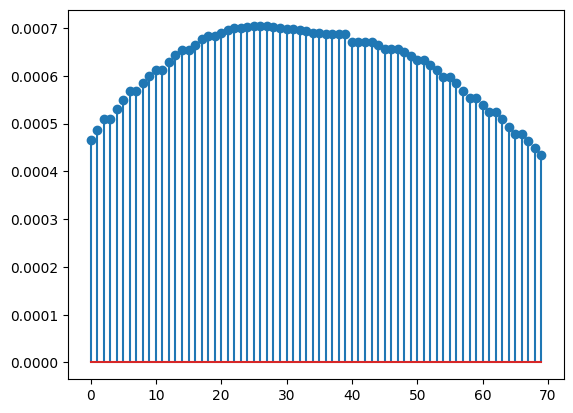

In [271]:
final_powers = np.zeros(channels)
for i in range(channels):
  final_powers[i] = multi_channel_signal_power_iter[i,length-1]
channel_axis = np.arange(0,channels,1)
plt.stem(channel_axis,final_powers)

New Initial Values (Pre-emphasized SIGNAL) in mW for Flat TOTAL Output (Constrained Launch Power):


array([0.58928664, 0.56276368, 0.53743549, 0.53745705, 0.51682941,
       0.49814066, 0.48234604, 0.48236535, 0.46814876, 0.45750313,
       0.44709973, 0.44711759, 0.43494155, 0.426032  , 0.41826769,
       0.41828436, 0.41160859, 0.40503943, 0.40041604, 0.40043196,
       0.39677429, 0.3940569 , 0.39135812, 0.39137363, 0.39048843,
       0.38960521, 0.38962062, 0.38963603, 0.39055019, 0.3914665 ,
       0.39238494, 0.3924004 , 0.39422826, 0.39515315, 0.39699381,
       0.39700941, 0.3988587 , 0.39887434, 0.39888998, 0.39890561,
       0.40821907, 0.40823504, 0.40825099, 0.40826694, 0.41206303,
       0.41781533, 0.41783161, 0.41784788, 0.42270587, 0.42762037,
       0.43358991, 0.43360674, 0.44067406, 0.44785664, 0.45937079,
       0.45938855, 0.46903285, 0.48220159, 0.49574032, 0.49575942,
       0.50967905, 0.52398979, 0.52400992, 0.53872332, 0.55640875,
       0.57335238, 0.57337433, 0.59219821, 0.61164062, 0.63317956])

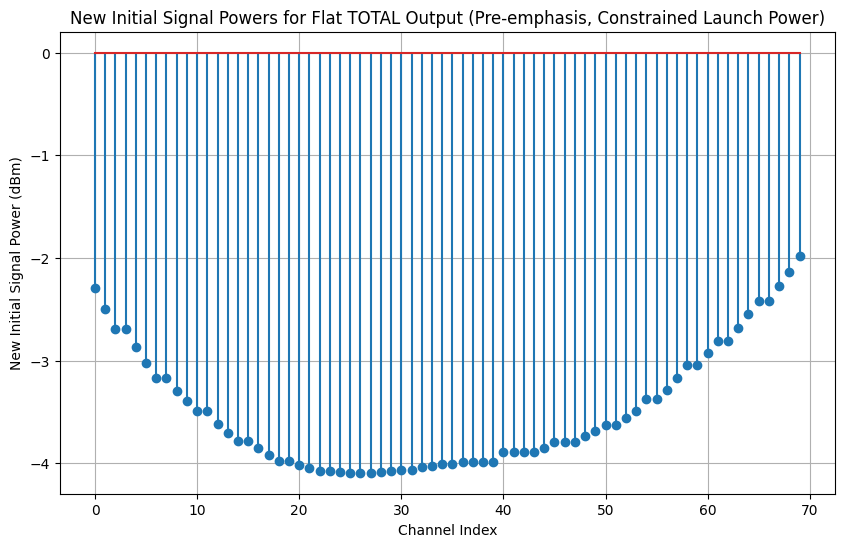


Total Launched Signal Power (Sum of New Initial Values) (mW): 31.622776601683796
Total Launched Signal Power (Sum of New Initial Values) (dBm): 15.0


In [272]:
import numpy as np

initial_flat_power_per_channel_dBm = EDFA_total_power - 10 * np.log10(channels)
initial_flat_power_mW_single_channel = 10**(initial_flat_power_per_channel_dBm / 10)

final_signal_powers_flat_run = multi_channel_signal_power_iter_flat_run[:, length] # Use length for final location
final_noise_powers_flat_run = multi_channel_noise_iter_flat_run[:, length] # Use length for final location
final_total_powers_flat_run = final_signal_powers_flat_run + final_noise_powers_flat_run

final_total_powers_for_preemphasis = final_total_powers_flat_run

target_total_launch_power_dBm = EDFA_total_power
target_total_launch_power_mW = 10**(target_total_launch_power_dBm/10)

epsilon = 1e-20

inverse_total_power_gain = 1 / (final_total_powers_for_preemphasis + epsilon)

scaling_constant_C = target_total_launch_power_mW / (np.sum(inverse_total_power_gain) + epsilon)


new_initial_values = scaling_constant_C * inverse_total_power_gain



# Display the new initial values (These are initial SIGNAL powers)
print("New Initial Values (Pre-emphasized SIGNAL) in mW for Flat TOTAL Output (Constrained Launch Power):")
display(new_initial_values)

#  visualize the new initial values with a stem plot
channel_axis = np.arange(0, channels, 1)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, 10*np.log10(new_initial_values)) # Plot in dBm
plt.xlabel('Channel Index')
plt.ylabel('New Initial Signal Power (dBm)')
plt.title('New Initial Signal Powers for Flat TOTAL Output (Pre-emphasis, Constrained Launch Power)')
plt.grid(True)
plt.show()

# Print the sum of the new initial values to show the total launched signal power
print(f"\nTotal Launched Signal Power (Sum of New Initial Values) (mW): {np.sum(new_initial_values)}")
print(f"Total Launched Signal Power (Sum of New Initial Values) (dBm): {10*np.log10(np.sum(new_initial_values))}")

## Multi-channel Signal Propagation with Attenuation and Amplification (Pre-emphasized Launch)

### Subtask:
Simulate the propagation of a multi-channel signal with pre-emphasized initial powers (`new_initial_values`) through the fiber with attenuation and periodic EDFA amplification (with gain tilt), and visualize the final power per channel.

**Reasoning**:
Initialize the multi-channel signal power with `new_initial_values`, simulate propagation step-by-step over the fiber length, applying attenuation and EDFA amplification at the appropriate locations, and then visualize the final power of each channel to assess the effectiveness of pre-emphasis.

--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at 500 km: 3.1623e+01 mW (15.00 dBm) ---
--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at 1000 km: 3.1623e+01 mW (15.00 dBm) ---
--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at 1500 km: 3.1623e+01 mW (15.00 dBm) ---
--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at 2000 km: 3.1623e+01 mW (15.00 dBm) ---
--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at 2500 km: 3.1623e+01 mW (15.00 dBm) ---
--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at 3000 km: 3.1623e+01 mW (15.00 dBm) ---
Final output SIGNAL power per channel (mW) after full simulation (Pre-emphasized Launch):


array([0.04136469, 0.04331414, 0.04535548, 0.04535548, 0.04716608,
       0.04893614, 0.05053936, 0.05053936, 0.05207506, 0.05328804,
       0.05452928, 0.05452928, 0.05605699, 0.05723079, 0.05829479,
       0.05829479, 0.059242  , 0.06020461, 0.06090175, 0.06090175,
       0.06146526, 0.06189132, 0.06232033, 0.06232033, 0.06246399,
       0.06260799, 0.06260799, 0.06260799, 0.06246399, 0.06232033,
       0.062177  , 0.062177  , 0.06189132, 0.06174897, 0.06146526,
       0.06146526, 0.06118286, 0.06118286, 0.06118286, 0.06118286,
       0.05979016, 0.05979016, 0.05979016, 0.05979016, 0.059242  ,
       0.05842917, 0.05842917, 0.05842917, 0.05776034, 0.05709916,
       0.05631573, 0.05631573, 0.05541531, 0.05452928, 0.05316548,
       0.05316548, 0.05207506, 0.05065587, 0.04927535, 0.04927535,
       0.04793246, 0.04662617, 0.04662617, 0.04535548, 0.0439167 ,
       0.0426216 , 0.0426216 , 0.04126955, 0.03996039, 0.03860377])


Final output TOTAL power per channel (mW) after full simulation (Pre-emphasized Launch):


array([0.34003636, 0.35606222, 0.37284267, 0.37282772, 0.38770798,
       0.40225363, 0.41542559, 0.41540896, 0.42802395, 0.43798364,
       0.44817492, 0.44815702, 0.46070302, 0.47033764, 0.47906853,
       0.47904944, 0.48681901, 0.49471452, 0.50042672, 0.50040683,
       0.50501983, 0.50850242, 0.51200902, 0.51198872, 0.51314936,
       0.51431264, 0.5142923 , 0.51427197, 0.5130682 , 0.51186727,
       0.51066916, 0.51064903, 0.50828139, 0.50709171, 0.50474058,
       0.50472075, 0.50238064, 0.50236093, 0.50234123, 0.50232156,
       0.49086115, 0.49084196, 0.49082277, 0.49080361, 0.48628212,
       0.4795872 , 0.47956852, 0.47954985, 0.47403857, 0.4685906 ,
       0.46213918, 0.46212125, 0.45470996, 0.44741747, 0.43620293,
       0.43618607, 0.42721717, 0.41555003, 0.40420131, 0.40418574,
       0.39314719, 0.38240991, 0.38239521, 0.37195139, 0.36012892,
       0.34948644, 0.34947307, 0.33836456, 0.32760886, 0.31646455])

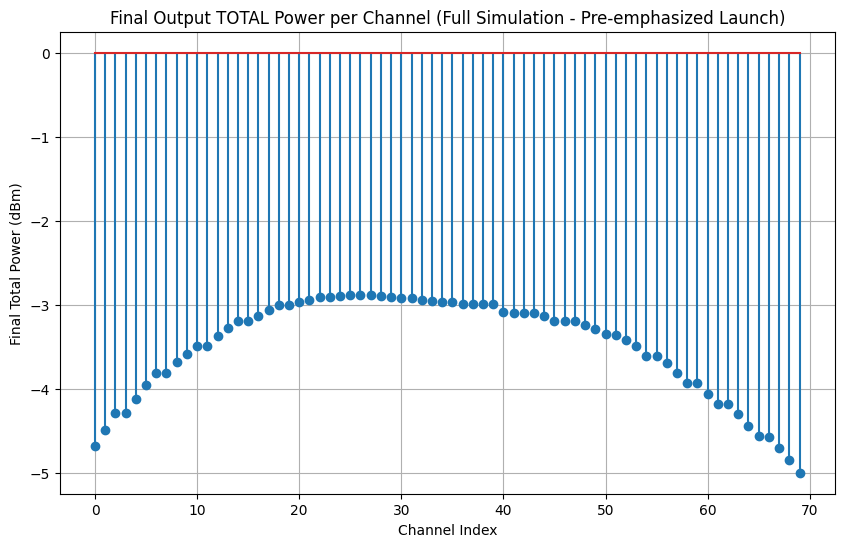

In [274]:

attenuation_linear_per_km = 10**(-attenuation_dB_per_km / 10)


target_total_power_dBm = EDFA_total_power
target_total_power_mW = 10**(target_total_power_dBm/10)


multi_channel_signal_power_full_sim = np.zeros((channels, length + 1))
multi_channel_noise_full_sim = np.zeros((channels, length + 1)) # Initialize noise array

multi_channel_signal_power_full_sim[:, 0] = new_initial_values

for i in range(1, length + 1):
    # Apply SINGLE attenuation value to all channels at the current step (from i-1 to i)
    multi_channel_signal_power_full_sim[:, i] = multi_channel_signal_power_full_sim[:, i-1] * attenuation_linear_per_km
    multi_channel_noise_full_sim[:, i] = multi_channel_noise_full_sim[:, i-1] * attenuation_linear_per_km
    if i in discrete_losses:
        loss_at_this_location_dB = discrete_losses[i]
        loss_linear = 10**(-loss_at_this_location_dB / 10)
        multi_channel_signal_power_full_sim[:, i] *= loss_linear
        multi_channel_noise_full_sim[:, i] *= loss_linear


    # Check if the current location is an EDFA location
    if i % span == 0: # Assuming EDFA is placed every 'span' km, starting at span km (100, 200, ..., length)
        const_power_EDFA_with_tilt(multi_channel_signal_power_full_sim, multi_channel_noise_full_sim, EDFA_total_power, channeled_lambdas, EDFA_noise, i, gain_weights)

        # --- Debugging Print AFTER EDFA Call ---
        # Print the total power in the arrays immediately after EDFA call at this location
        # Ensure print at the very last kilometer (length) where EDFA is located
        if i % 500 == 0 or i == length :
             total_power_after_EDFA_call = np.sum(multi_channel_signal_power_full_sim[:, i]) + np.sum(multi_channel_noise_full_sim[:, i])
             epsilon = 1e-20
             print(f"--- Simulation Loop Debug: Total Power in Arrays AFTER EDFA call at {i} km: {total_power_after_EDFA_call:.4e} mW ({10*np.log10(total_power_after_EDFA_call+epsilon):.2f} dBm) ---")
        # --- End Debugging Print AFTER EDFA Call ---


# Extract the final power for each channel at the end of the fiber (at location 'length')
final_signal_powers_full_sim = multi_channel_signal_power_full_sim[:, length]
final_noise_powers_full_sim = multi_channel_noise_full_sim[:, length]
final_total_powers_full_sim = final_signal_powers_full_sim + final_noise_powers_full_sim


# Display the final output power per channel
print("Final output SIGNAL power per channel (mW) after full simulation (Pre-emphasized Launch):")
display(final_signal_powers_full_sim)

print("\nFinal output TOTAL power per channel (mW) after full simulation (Pre-emphasized Launch):")
display(final_total_powers_full_sim)


# Visualize the final powers per channel with a stem plot
channel_axis = np.arange(0, channels, 1)

# Plot Final Total Power (Signal + Noise)
plt.figure(figsize=(10, 6))
plt.stem(channel_axis, 10*np.log10(final_total_powers_full_sim)) # Plot in dBm
plt.xlabel('Channel Index')
plt.ylabel('Final Total Power (dBm)')
plt.title('Final Output TOTAL Power per Channel (Full Simulation - Pre-emphasized Launch)')
plt.grid(True)
plt.show()